### Exercício 4

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Treine modelos, através da abordagem de holdout, de:
    1. kNN (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros, k entre 10 a 100)
    3. Random Forest (efetuando as etapas de preprocessamento necessárias e a devida otimização de parametros)
4. Compare os classificadores através da curva ROC e AUC

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

In [263]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [264]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


In [265]:
label = np.array(df.y)
features = np.array(df.drop(['y'], axis = 1))

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizado = scaler.transform(features)

In [266]:
trainFeatures, testeFeatures, trainLabel, testLabel = train_test_split(featuresNormalizado, label, train_size = 0.7, random_state = 42)

In [267]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(trainFeatures, trainLabel)

RandomForestClassifier()

In [268]:
predictProbaForest = forest.predict_proba(testeFeatures)

In [269]:
fprForest, tprForest, limiarForest = roc_curve(testLabel, predictProbaForest[:,1], pos_label=1)

In [270]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(trainFeatures, trainLabel)

KNeighborsClassifier(n_neighbors=10)

In [271]:
predictProbaKnn = knn.predict_proba(testeFeatures)

In [272]:
fprKnn, tprKnn, limiarKnn = roc_curve(testLabel, predictProbaKnn[:,1], pos_label=1)

In [273]:
tree = DecisionTreeClassifier(min_samples_leaf = 100)
tree.fit(trainFeatures, trainLabel)

DecisionTreeClassifier(min_samples_leaf=100)

In [274]:
predictProbaTree = tree.predict_proba(testeFeatures)

In [275]:
fprTree, tprTree, limiarTree = roc_curve(testLabel, predictProbaTree[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

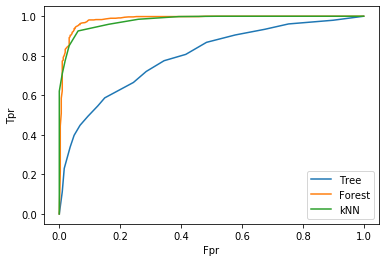

In [276]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprKnn, tprKnn)
plt.legend(['Tree', 'Forest', 'kNN'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [277]:
set(limiarTree)

{0.16901408450704225,
 0.2358490566037736,
 0.37,
 0.3902439024390244,
 0.4230769230769231,
 0.55,
 0.5544554455445545,
 0.68,
 0.6916666666666667,
 0.7,
 0.75,
 0.78,
 0.7920792079207921,
 0.8543689320388349,
 0.9,
 0.9302325581395349,
 0.9553072625698324,
 0.9606299212598425,
 1.9606299212598426}

In [278]:
auc(fprForest, tprForest),auc(fprTree, tprTree),auc(fprKnn, tprKnn)

(0.984719383831059, 0.7960313797877251, 0.978808205331048)

#### Pratica 2 -  Dataset Titanic (datasets/titanic.csv)

#### Descricao

Problema

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Atributos

- survival (0 = No, 1 = Yes)
- pclas: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Sex	
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- ticket: Ticket number	
- fare: Passenger fare	
- cabin: Cabin number	
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização e determine o melhor classificador

In [279]:
dfTitanic = pd.read_csv('datasets/titanic.csv')

In [280]:
dfTitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [281]:
dfTitanic = dfTitanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [282]:
dfTitanic.dtypes

Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [283]:
dfNumerico = pd.get_dummies(dfTitanic, prefix_sep='_', drop_first=True)

In [284]:
dfNumerico.describe()

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [285]:
features = np.array(dfNumerico.drop(['Survived'], axis = 1))
label = np.array(dfNumerico.Survived)

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [286]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [287]:
listaErroTreino = []
listaErroTeste = []

for i in range(200,1,-2):
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

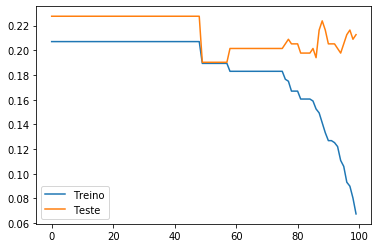

In [288]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [289]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#58

In [290]:
tree = DecisionTreeClassifier(min_samples_split= 58)
tree.fit(featuresTreino, labelTreino)
predictProbaTree = tree.predict_proba(featuresTeste)

fprTree, tprTree, limiarTree = roc_curve(labelTeste, predictProbaTree[:,1], pos_label=1)

In [291]:
listaErroTreino = []
listaErroTeste = []

for i in range(1,200,2):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(featuresTreino, labelTreino)
    
    predicaoTreino = forest.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = forest.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

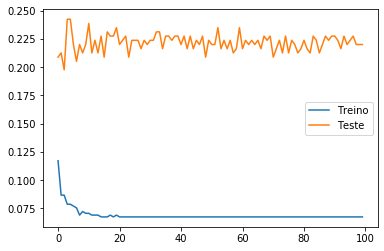

In [292]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [293]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#4    

In [294]:
forest = RandomForestClassifier(min_samples_split= 4)
forest.fit(featuresTreino, labelTreino)
predictProbaForest = forest.predict_proba(featuresTeste)

fprForest, tprForest, limiarForest = roc_curve(labelTeste, predictProbaForest[:,1], pos_label=1)

In [295]:
listaAccTreino = []
listaAccTeste = []

for neighbor in range(5,100,1):
       
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoKnnTreino = knn.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoKnnTreino)
    
    predicaoKnnTeste = knn.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoKnnTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)
    

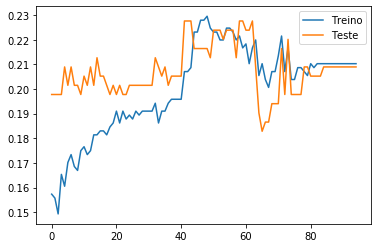

In [296]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [297]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#65   

In [298]:
kNN = KNeighborsClassifier(n_neighbors = 65)
kNN.fit(featuresTreino, labelTreino)
predictProbaKNN = kNN.predict_proba(featuresTeste)

fprKnn, tprKnn, limiarKnn = roc_curve(labelTeste, predictProbaKNN[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

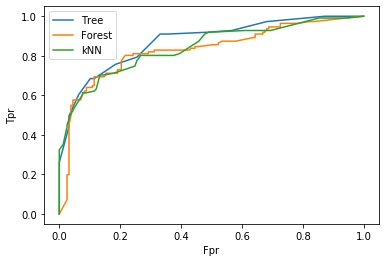

In [299]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprKnn, tprKnn)
plt.legend(['Tree', 'Forest', 'kNN'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [300]:
auc(fprForest, tprForest),auc(fprTree, tprTree),auc(fprKnn, tprKnn)

(0.8293739599472083, 0.8728696849715958, 0.8415676823320136)

####  Pratica 3 -  Detecção de Emprestimo Bancário (datasets/loan.csv)

#### Descricao

Problema

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Atributos

- Age : Customer's age in completed years
- Experience : #years of professional experience
- Income : Annual income of the customer
- Family : Family size of the customer
- Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage : Value of house mortgage if any.
- Securities Account : Does the customer have a securities account with the bank?
- CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
- Online : Does the customer use internet banking facilities?
- Credit card : Does the customer use a credit card issued by
- class: made loan (0=no, 1=yes)

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção do dígito de empréstimos

In [301]:
df = pd.read_csv("datasets/loan.csv")

In [302]:
df.describe()

,Age,Experience,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,11.463166,11.467954,46.033729,1.147663,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,23.000000,-3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [303]:
df.dtypes

Age                   int64
Experience            int64
Income                int64
Family                int64
Education             int64
Mortgage              int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
class                 int64
dtype: object

In [304]:
features = np.array(df.drop(['class'], axis = 1))
label = np.array(df['class'])

scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [305]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [306]:
listaErroTreino = []
listaErroTeste = []

for i in range(200,1,-2):
    tree = DecisionTreeClassifier(min_samples_split= i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = tree.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

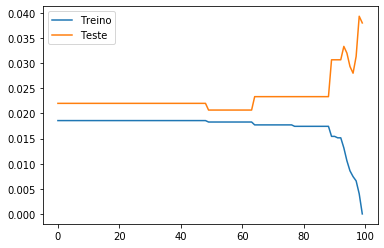

In [307]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [308]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#50

In [309]:
tree = DecisionTreeClassifier(min_samples_split= 50)
tree.fit(featuresTreino, labelTreino)
predictProbaTree = tree.predict_proba(featuresTeste)

fprTree, tprTree, limiarTree = roc_curve(labelTeste, predictProbaTree[:,1], pos_label=1)

In [310]:
listaErroTreino = []
listaErroTeste = []

for i in range(1,200,2):
    forest = RandomForestClassifier(n_estimators = i)
    forest.fit(featuresTreino, labelTreino)
    
    predicaoTreino = forest.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoTreino)
    
    predicaoTeste = forest.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoTeste)
    
    #100% - acc% = erro
    listaErroTeste.append(1 - accTeste)
    listaErroTreino.append(1- accTreino)
    

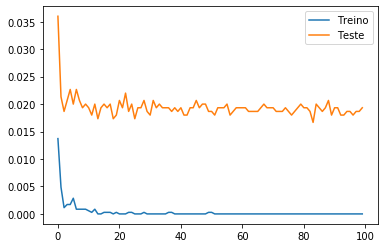

In [311]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [312]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#14   

In [313]:
forest = RandomForestClassifier(min_samples_split= 14)
forest.fit(featuresTreino, labelTreino)
predictProbaForest = forest.predict_proba(featuresTeste)

fprForest, tprForest, limiarForest = roc_curve(labelTeste, predictProbaForest[:,1], pos_label=1)

In [314]:
listaAccTreino = []
listaAccTeste = []

for neighbor in range(5,100,1):
       
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(featuresTreino, labelTreino)
    
    predicaoKnnTreino = knn.predict(featuresTreino)
    accTreino = accuracy_score(labelTreino, predicaoKnnTreino)
    
    predicaoKnnTeste = knn.predict(featuresTeste)
    accTeste = accuracy_score(labelTeste, predicaoKnnTeste)
    
    listaAccTreino.append(1-accTreino)
    listaAccTeste.append(1-accTeste)
    

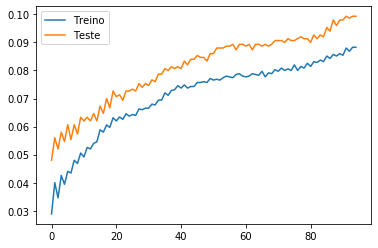

In [315]:
plt.plot(listaAccTreino)
plt.plot(listaAccTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [316]:
#for (i, item) in enumerate(listaErroTeste, start=1):
#    print(i, item)
#7   

In [317]:
kNN = KNeighborsClassifier(n_neighbors = 7)
kNN.fit(featuresTreino, labelTreino)
predictProbaKNN = kNN.predict_proba(featuresTeste)

fprKnn, tprKnn, limiarKnn = roc_curve(labelTeste, predictProbaKNN[:,1], pos_label=1)

Text(0, 0.5, 'Tpr')

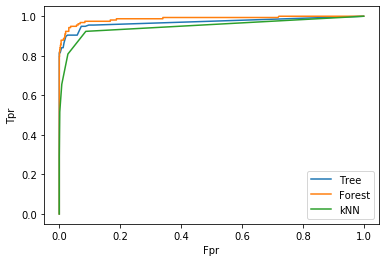

In [318]:
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprKnn, tprKnn)
plt.legend(['Tree', 'Forest', 'kNN'])
plt.xlabel('Fpr')
plt.ylabel('Tpr')

In [319]:
auc(fprForest, tprForest),auc(fprTree, tprTree),auc(fprKnn, tprKnn)

(0.9873654855798645, 0.9704412120407302, 0.9482122446656643)

####  Pratica 4 -  Detecção de Números (datasets/digit.csv)

#### Descricao

Problema

Detecção de imagens com números (0 a 9) escritos a mão.

Atributos

- Label (0,1,2,3,4,5,6,7,8,9)
- pixel0
- pixel1
- ...
- pixel783

Etapas, fazendo a devida otimização de parametros:
1. Utilizando a abordagem de holdout (70% para treinamento, 30% para teste), fazendo uso do ponto de operação com a generalização, determine:
    - O melhor classificador para detecção dos números
    - O melhor classificador para detecção do dígito '3'

In [320]:
df = pd.read_csv('datasets/digit.csv')

In [321]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [322]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [323]:
set(df.label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [324]:
features = np.array(df.drop(['label'], axis =1))
label = np.array(df['label'])

In [325]:
scaler = MaxAbsScaler()
scaler.fit(features)
featuresNormalizadas = scaler.transform(features)

In [326]:
featuresTreino, featuresTeste, labelTreino, labelTeste = train_test_split(featuresNormalizadas, label, train_size = 0.7, random_state = 42)

In [327]:
listaErroTreino = []
listaErroTeste = []

for i in range(200, 1, -20):
    tree = DecisionTreeClassifier(min_samples_split = i)
    tree.fit(featuresTreino, labelTreino)
    
    predicaoTreino = tree.predict(featuresTreino)
    predicaoTeste = tree.predict(featuresTeste)
    
    erroTreino =(1 - accuracy_score(predicaoTreino, labelTreino))
    erroTeste = (1- accuracy_score(predicaoTeste, labelTeste))
    
    listaErroTeste.append(erroTeste)
    listaErroTreino.append(erroTreino)

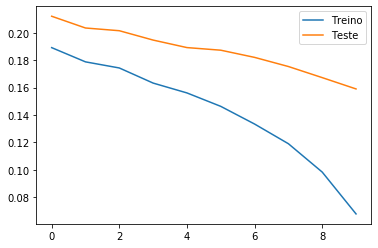

In [328]:
plt.plot(listaErroTreino)
plt.plot(listaErroTeste)
plt.legend(['Treino', 'Teste'])
plt.show()

In [329]:
tree = DecisionTreeClassifier(min_samples_split = 20)
tree.fit(featuresTreino, labelTreino)

DecisionTreeClassifier(min_samples_split=20)

In [330]:
predictTeste = tree.predict(featuresTeste)
matrix = confusion_matrix(labelTeste, predictTeste)

In [331]:
matrix
#linha = classe
#coluna = como a classe foi classificada

array([[1084,    6,   23,   10,   10,   36,   13,    3,   11,    4],
       [   3, 1303,   18,    8,    9,    6,    3,    5,   25,    9],
       [  27,   27, 1059,   34,   25,   21,   16,   33,   42,   10],
       [  22,   19,   50, 1053,   21,   84,    1,   21,   56,   28],
       [   8,   14,   19,   18, 1045,   15,   21,    8,   24,   51],
       [  15,   16,   18,   59,   24,  856,   34,   11,   32,   20],
       [  22,    6,   24,   16,   30,   35, 1093,    3,   21,    6],
       [  15,   11,   38,   25,   19,   13,    0, 1200,    6,   32],
       [  23,   30,   40,   49,   36,   38,   20,    7,  936,   30],
       [  10,    3,   10,   27,   67,   32,   12,   27,   44,  999]])

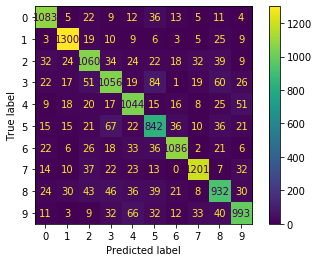

In [332]:
ConfusionMatrixDisplay(confusion_matrix(labelTeste, predicaoTeste), display_labels=range(0,10)).plot()

In [333]:
confiancas = tree.predict_proba(featuresTeste)
confiancas
# tree.predict_proba(featuresTeste)[0] confianças da primeira linha (instância 0)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [334]:
#Confianças do dígito 3
confiancas[:,3]

array([0., 0., 0., ..., 0., 0., 0.])

In [335]:
fprTree, tprTree, limiaresTree = roc_curve(labelTeste, confiancas[:,3], pos_label = 3)

In [336]:
limiaresTree

array([2.        , 1.        , 0.94736842, 0.94444444, 0.94117647,
       0.92857143, 0.9       , 0.88888889, 0.88235294, 0.875     ,
       0.85714286, 0.83333333, 0.81818182, 0.8125    , 0.8       ,
       0.75      , 0.70588235, 0.68421053, 0.66666667, 0.64705882,
       0.625     , 0.57142857, 0.55555556, 0.54545455, 0.5       ,
       0.44444444, 0.41666667, 0.4       , 0.38888889, 0.375     ,
       0.36363636, 0.33333333, 0.30769231, 0.29411765, 0.28571429,
       0.27777778, 0.27272727, 0.26666667, 0.25      , 0.23529412,
       0.22222222, 0.21052632, 0.2       , 0.18181818, 0.17647059,
       0.16666667, 0.15789474, 0.15384615, 0.14285714, 0.13333333,
       0.125     , 0.11764706, 0.11111111, 0.10526316, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.        ])

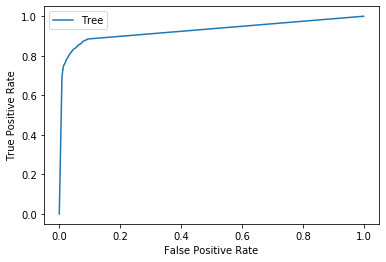

In [337]:
plt.plot(fprTree, tprTree)
plt.legend(['Tree'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [338]:
auc(fprTree, tprTree)

0.9274766001261294